In [1]:
import numpy as np
import pandas as ad
import os
import matplotlib.pyplot as plt

In [2]:
def get_mask(path):
    df = ad.read_csv("annotation_2.csv")
    for file in os.listdir(path):
        if file[:-4] in df["seriesuid"].tolist():
            img = np.load(os.path.join(path,file))
            mask = np.zeros_like(img)
            df_2 = df[df["seriesuid"] == file[:-4]]
            for i in df_2.index:
                x, y, d =float( df_2["coordX"][i]), float(df_2["coordY"][i]), float(df_2["diameter_mm"][i])
                xx, yy = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]))
                dist = np.sqrt((xx - x) ** 2 + (yy - y) ** 2 )
                mask[dist <= d / 2] = 1
                np.save(os.path.join("D:/fin_de_etude/data/nodule_mask/nodule",file),mask)
        else:
            img = np.load(os.path.join(path,file))
            mask = np.zeros_like(img)
            np.save(os.path.join("D:/fin_de_etude/data/nodule_mask/nonnodule",file),mask)
            

In [3]:
get_mask("D:/fin_de_etude/data/dataset_2d/nodule/")
get_mask("D:/fin_de_etude/data/dataset_2d/nonnodule/")

In [4]:
masks = os.listdir("D:/fin_de_etude/data/nodule_mask/nodule/")
print(len(masks))
masks = masks[500:540]

1175


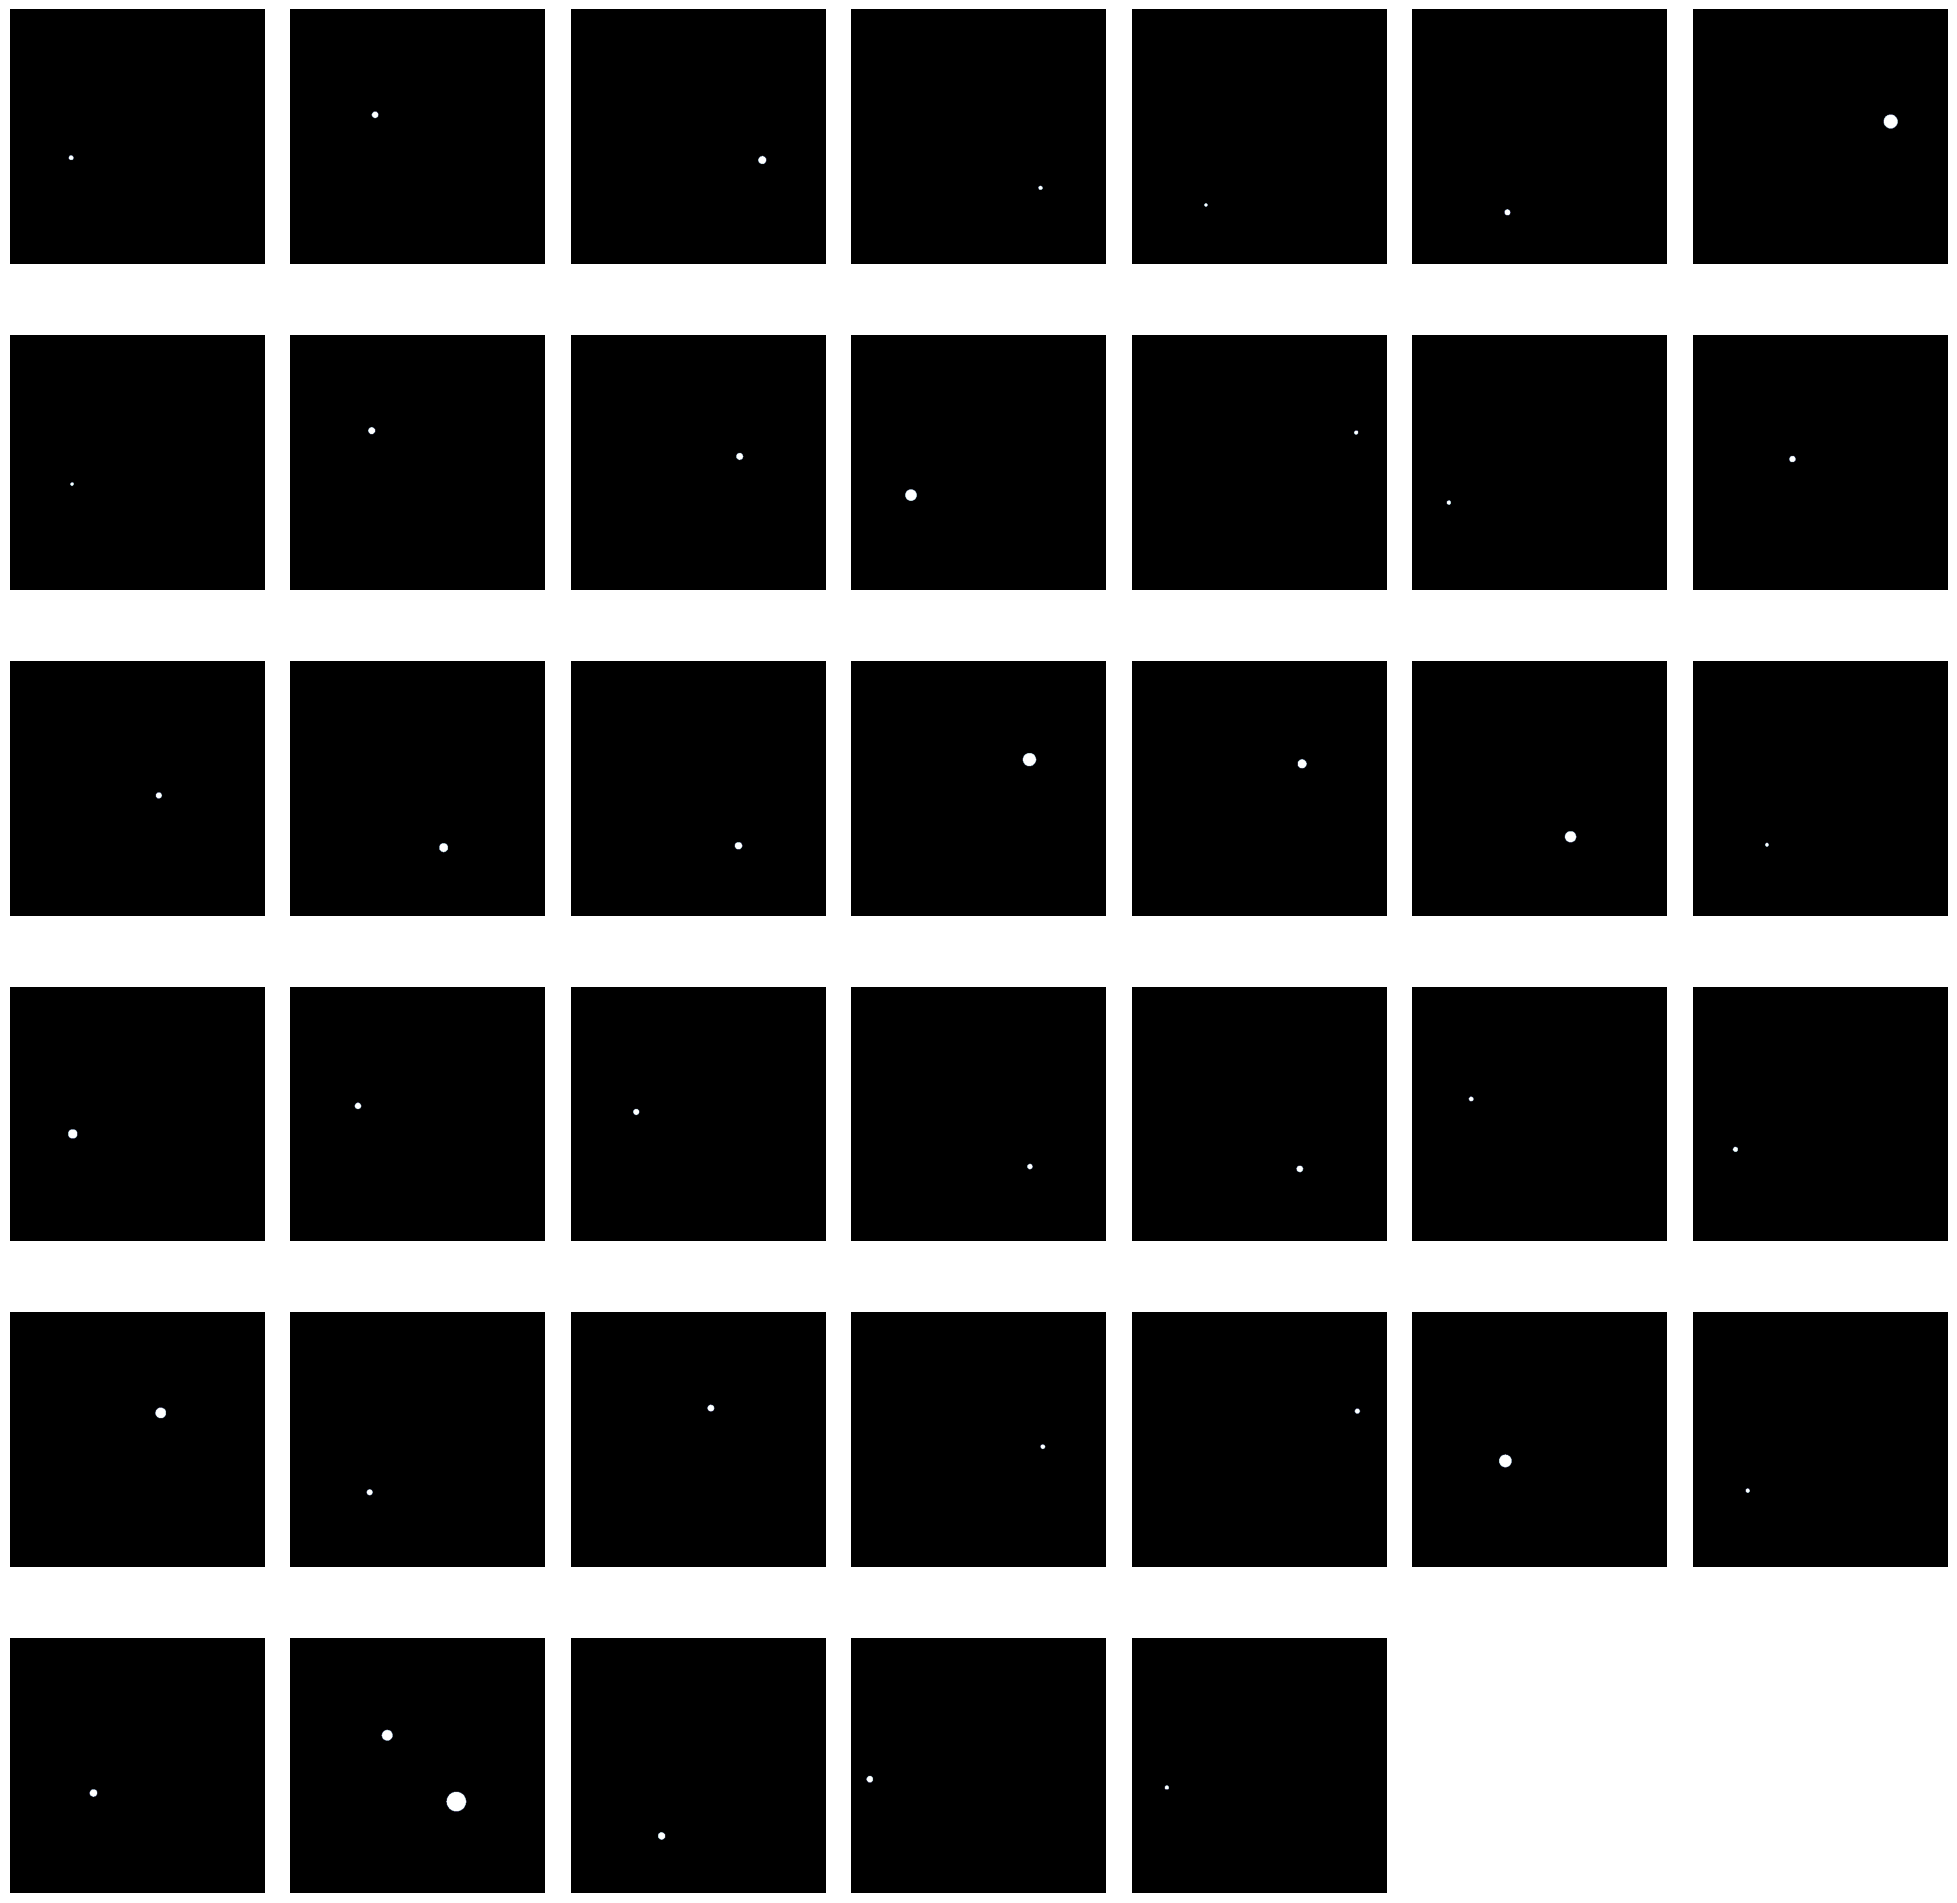

In [5]:
n_samples=len(masks)
num_cols = int(np.ceil(np.sqrt(n_samples)))
num_rows = int(np.ceil(n_samples / num_cols))
fig = plt.figure(figsize=(25, 25))
i = 0
for img in masks:
    img = np.load(os.path.join("D:/fin_de_etude/data/nodule_mask/nodule/",img))

    axs =   fig.add_subplot(
                                    num_rows, num_cols,  1+i)
    axs.axis('off')
    axs.imshow(img,cmap=plt.cm.bone)
        
            
    i+=1
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # Show the plot
plt.show()

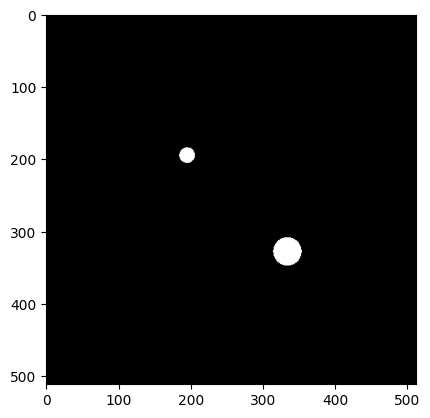

In [6]:
image_gray = np.load("D:/fin_de_etude/data/nodule_mask/nodule/image453_slice113.npy")
plt.imshow(image_gray,cmap="gray")